# Imports and Load Data

In [41]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_moons

m = 500
moons = make_moons(n_samples=m, shuffle=True, noise=None, random_state=None)

# Votings
* Hard voting
* Soft Voting

In [42]:
from sklearn.model_selection import train_test_split

X = moons[0]
y = moons[1]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),('rf', rnd_clf),('svc',svm_clf)],
    voting='hard'
) 
voting_clf.fit(X_train, y_train)
print('train accuracy:',voting_clf.score(X_train, y_train))
print('test accuracy:',voting_clf.score(X_test, y_test))

train accuracy: 1.0
test accuracy: 0.98


In [45]:
from sklearn.metrics import accuracy_score

for clf in voting_clf.estimators_:
    preds = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_train,preds))

LogisticRegression 0.885
RandomForestClassifier 1.0
SVC 1.0


In [46]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),('rf', rnd_clf),('svc',svm_clf)],
    voting='soft'
) 
voting_clf.fit(X_train, y_train)
print('train accuracy:',voting_clf.score(X_train, y_train))
print('test accuracy:',voting_clf.score(X_test, y_test))

train accuracy: 1.0
test accuracy: 1.0


# Bagging et Pasting

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
    # bloque a 100 le nb de sample par bag
)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.94

In [55]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1,
    oob_score=True # out-of-bag evaluation des 37% non utilisés si 
)

bag_clf.fit(X_train, y_train)
print('on the oob:',bag_clf.oob_score_)

on the oob: 0.99


In [56]:
from sklearn.ensemble import RandomForestClassifier

rdf_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=16, n_jobs=-1
)
rdf_clf.fit(X_train, y_train)
rdf_clf.score(X_test, y_test)

1.0

In [58]:
# random Forest equivalent à 
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
print('score:',bag_clf.score(X_test,y_test))

score: 1.0


In [59]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09426393892692779
sepal width (cm) 0.024337579506405697
petal length (cm) 0.4292080370280489
petal width (cm) 0.4521904445386175


# Boosting 
* AdaBoost
* Gradient Boosting

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)

ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

1.0

Gradient boosting

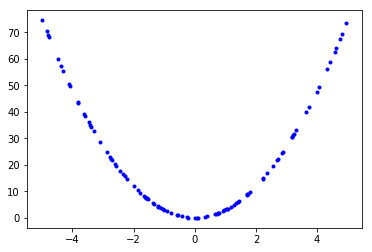

In [134]:
import numpy as np

X = 10 *np.random.rand(100, 1) - 5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

import matplotlib
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.show()

In [136]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([4.25800175])

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1)
gbrt.fit(X,y)
gbrt.score(X,y)

0.38779840682702976